# Introduction

# Predictive Maintenance for Bike Rentals

This notebook demonstrates the complete workflow for developing a predictive maintenance model for bike rentals. We will:
- **Gather Data** from multiple sources: bike rentals, weather data, and sensor data.
- **Explore the Data** to understand its structure, patterns, and key insights.
- **Preprocess the Data** by cleaning it, handling missing values, encoding categorical data, and normalizing features.




# Import necessary libraries

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Set visualization style
sns.set(style="whitegrid")

print("Libraries imported successfully.")


Libraries imported successfully.


# Data gathering

We are loading data from three sources:
1. **Bike Rentals Data:** Contains rental dates, bike IDs, and rental counts.
2. **Weather Data:** Contains dates, average temperatures, and precipitation levels.
3. **Sensor Data:** Contains bike sensor readings (e.g., vibration, temperature).
   
If the corresponding CSV files are not present in the working directory, sample data will be created.



In [13]:
# ---------- Bike Rentals Data ----------
if not os.path.exists("bike_rentals.csv"):
    # Create sample bike rentals data if not found
    df_bike = pd.DataFrame({
        "rental_date": pd.date_range(start="2025-01-01", periods=10, freq="D"),
        "bike_id": [101, 102, 103, 101, 102, 103, 101, 102, 103, 101],
        "rental_count": [15, 20, 10, 12, 22, 11, 18, 19, 9, 17]
    })
    df_bike.to_csv("bike_rentals.csv", index=False)
    print("Sample 'bike_rentals.csv' created.")
else:
    df_bike = pd.read_csv("bike_rentals.csv")
    print("'bike_rentals.csv' loaded successfully.")

# ---------- Weather Data ----------
if not os.path.exists("weather_data.csv"):
    # Create sample weather data if not found
    df_weather = pd.DataFrame({
        "date": pd.date_range(start="2025-01-01", periods=10, freq="D"),
        "avg_temp": [30, 31, 29, 32, 30, 28, 27, 26, 25, 24],
        "precipitation": [0, 0.1, 0, 0.2, 0, 0, 0.05, 0, 0.1, 0]
    })
    df_weather.to_csv("weather_data.csv", index=False)
    print("Sample 'weather_data.csv' created.")
else:
    df_weather = pd.read_csv("weather_data.csv")
    print("'weather_data.csv' loaded successfully.")

# ---------- Sensor Data ----------
if not os.path.exists("sensor_data.csv"):
    # Create sample sensor data if not found
    df_sensor = pd.DataFrame({
        "bike_id": [101, 102, 103, 101, 102, 103, 101, 102, 103, 101],
        "date": pd.date_range(start="2025-01-01", periods=10, freq="D"),
        "vibration": [0.2, 0.3, 0.25, 0.22, 0.31, 0.26, 0.21, 0.33, 0.27, 0.20],
        "temp_reading": [65, 66, 64, 67, 65, 63, 66, 64, 68, 65]
    })
    df_sensor.to_csv("sensor_data.csv", index=False)
    print("Sample 'sensor_data.csv' created.")
else:
    df_sensor = pd.read_csv("sensor_data.csv")
    print("'sensor_data.csv' loaded successfully.")

#  first few rows of each dataset:
print("\nBike Rentals Data:")
display(df_bike.head())

print("\nWeather Data:")
display(df_weather.head())

print("\nSensor Data:")
display(df_sensor.head())


'bike_rentals.csv' loaded successfully.
'weather_data.csv' loaded successfully.
'sensor_data.csv' loaded successfully.

Bike Rentals Data:


,rental_date,bike_id,rental_count
0,2023-01-01,101,15
1,2023-01-02,102,20
2,2023-01-03,103,10
3,2023-01-04,101,12
4,2023-01-05,102,22



Weather Data:


,date,avg_temp,precipitation
0,2023-01-01,30,0.0
1,2023-01-02,31,0.1
2,2023-01-03,29,0.0
3,2023-01-04,32,0.2
4,2023-01-05,30,0.0



Sensor Data:


,bike_id,date,vibration,temp_reading
0,101,2023-01-01,0.20,65
1,102,2023-01-02,0.30,66
2,103,2023-01-03,0.25,64
3,101,2023-01-04,0.22,67
4,102,2023-01-05,0.31,65


## Data Merging and Exploratory Data Analysis (EDA)

In this section, we will:
- Convert the date columns to datetime objects.
- Rename columns for consistency.
- Merge the three datasets into one unified DataFrame.
- Perform exploratory data analysis (EDA) by displaying dataset information, statistical summaries, missing values, and a correlation matrix.



Merged Dataset Preview:


,date,bike_id,rental_count,vibration,temp_reading,avg_temp,precipitation
0,2023-01-01,101,15,0.20,65,30,0.0
1,2023-01-02,102,20,0.30,66,31,0.1
2,2023-01-03,103,10,0.25,64,29,0.0
3,2023-01-04,101,12,0.22,67,32,0.2
4,2023-01-05,102,22,0.31,65,30,0.0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           10 non-null     datetime64[ns]
 1   bike_id        10 non-null     int64         
 2   rental_count   10 non-null     int64         
 3   vibration      10 non-null     float64       
 4   temp_reading   10 non-null     int64         
 5   avg_temp       10 non-null     int64         
 6   precipitation  10 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 692.0 bytes

Statistical Summary:


,date,bike_id,rental_count,vibration,temp_reading,avg_temp,precipitation
count,10,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000
mean,2023-01-05 12:00:00,101.900000,15.300000,0.255000,65.300000,28.20000,0.045000
min,2023-01-01 00:00:00,101.000000,9.000000,0.200000,63.000000,24.00000,0.000000
25%,2023-01-03 06:00:00,101.000000,11.250000,0.212500,64.250000,26.25000,0.000000
50%,2023-01-05 12:00:00,102.000000,16.000000,0.255000,65.000000,28.50000,0.000000
75%,2023-01-07 18:00:00,102.750000,18.750000,0.292500,66.000000,30.00000,0.087500
max,2023-01-10 00:00:00,103.000000,22.000000,0.330000,68.000000,32.00000,0.200000
std,NaN,0.875595,4.571652,0.047434,1.494434,2.65832,0.068516



Missing Values in Each Column:
date             0
bike_id          0
rental_count     0
vibration        0
temp_reading     0
avg_temp         0
precipitation    0
dtype: int64


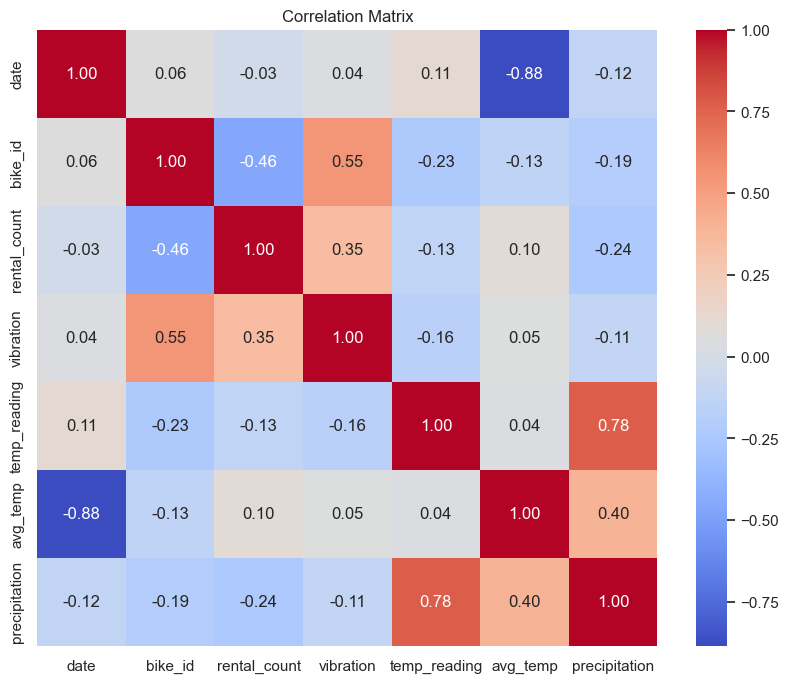

In [16]:
# ---------- Convert date columns ----------
df_bike["rental_date"] = pd.to_datetime(df_bike["rental_date"])
df_weather["date"] = pd.to_datetime(df_weather["date"])
df_sensor["date"] = pd.to_datetime(df_sensor["date"])

# Rename 'rental_date' to 'date' in bike rentals for consistency
df_bike.rename(columns={"rental_date": "date"}, inplace=True)

# ---------- Merge datasets ----------
# Merge bike rentals with sensor data on 'bike_id' and 'date'
df_merged = pd.merge(df_bike, df_sensor, on=["bike_id", "date"], how="left")
# Merge the result with weather data on 'date'
df_merged = pd.merge(df_merged, df_weather, on="date", how="left")

print("\nMerged Dataset Preview:")
display(df_merged.head())

# ---------- Exploratory Data Analysis (EDA) ----------
print("\nDataset Information:")
df_merged.info()

print("\nStatistical Summary:")
display(df_merged.describe())

print("\nMissing Values in Each Column:")
print(df_merged.isnull().sum())

# Plot the correlation matrix to visualize relationships among numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df_merged.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


## Data Preprocessing

1. **Handling Missing Values:** Fill missing values with the median (for numeric columns) or mode (for categorical columns).
2. **Encoding Categorical Data:** Convert categorical variables (like `bike_id`) to numerical format using Label Encoding.
3. **Normalizing Numerical Features:** Standardize the numerical features to have a mean of 0 and a standard deviation of 1.


In [19]:
# ---------- Handle Missing Values ----------
for col in df_merged.columns:
    if df_merged[col].isnull().sum() > 0:
        if df_merged[col].dtype == "object":
            df_merged[col].fillna(df_merged[col].mode()[0], inplace=True)
        else:
            df_merged[col].fillna(df_merged[col].median(), inplace=True)

# ---------- Encode Categorical Data ----------
# Convert 'bike_id' to a string so it is treated as a categorical feature
df_merged["bike_id"] = df_merged["bike_id"].astype(str)

# Identify categorical columns (object type) and apply Label Encoding
cat_cols = df_merged.select_dtypes(include=["object"]).columns
print("\nCategorical Columns Before Encoding:", list(cat_cols))

le = LabelEncoder()
for col in cat_cols:
    df_merged[col] = le.fit_transform(df_merged[col])

# ---------- Normalize Numerical Features ----------
# Identify numerical columns (we exclude the 'date' column since it's datetime)
num_cols = df_merged.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
df_merged[num_cols] = scaler.fit_transform(df_merged[num_cols])

print("\nPreprocessed Dataset Preview:")
display(df_merged.head())



Categorical Columns Before Encoding: ['bike_id']

Preprocessed Dataset Preview:


,date,bike_id,rental_count,vibration,temp_reading,avg_temp,precipitation
0,2023-01-01,-1.083473,-0.069171,-1.222222,-0.211604,0.713746,-0.692308
1,2023-01-02,0.120386,1.083686,1.000000,0.493742,1.110272,0.846154
2,2023-01-03,1.324244,-1.222029,-0.111111,-0.916949,0.317221,-0.692308
3,2023-01-04,-1.083473,-0.760886,-0.777778,1.199088,1.506798,2.384615
4,2023-01-05,0.120386,1.544829,1.222222,-0.211604,0.713746,-0.692308
